In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import lightgbm as lgb

In [2]:
df=pd.read_csv("fleet_train.csv")
df.head(50)

,Maintenance_flag,record_id,Measurement_timestamp,Vehicle_speed_sensor,Vibration,Engine_Load,Engine_Coolant_Temp,Intake_Manifold_Pressure,Engine_RPM,Speed_OBD,...,GPS_Altitude,Turbo_Boost_And_Vcm_Gauge,Trip_Distance,Litres_Per_100km_Inst,Accel_Ssor_Total,CO2_in_g_per_km_Inst,Trip_Time_journey,fleetid,truckid,Region
0,0,8229,22FEB16:18:18:15,35,249.188875,21.568628,88,116,1115.5,35,...,164,2.755716,310.26200,2.351502,0.045858,62.197178,11539,Fleet_00713F1,Truck_0711X1,1
1,0,932,22FEB16:16:16:38,142,243.236572,20.392157,88,135,1782.5,142,...,436,5.511435,161.02463,1.244649,0.043655,32.920940,4242,Fleet_01213F1,Truck_0081X1,1
2,0,836,22FEB16:16:15:02,128,244.015378,43.529410,81,109,1588.0,128,...,508,1.740453,158.23788,2.124100,0.073833,56.182410,4146,Fleet_01213F1,Truck_0081X1,1
3,0,570,22FEB16:16:10:36,117,244.627297,99.607840,89,128,1899.5,117,...,618,4.496170,148.82233,0.000000,0.059974,0.000000,3880,Fleet_01013F1,Truck_0171X1,1
4,0,7098,22FEB16:17:59:24,98,245.684248,73.333336,89,123,1230.5,98,...,154,3.770981,296.00378,4.031921,-0.019424,106.644250,10408,Fleet_00413F1,Truck_0641X1,2
5,0,4930,22FEB16:17:23:16,96,245.795506,0.000000,83,115,1175.0,96,...,216,2.610680,252.72640,0.000000,-0.117610,0.000000,8240,Fleet_00713F1,Truck_0421X1,1
6,0,7459,22FEB16:18:05:25,55,248.076295,39.607845,87,110,1324.0,55,...,156,1.885490,304.47766,3.408120,0.041098,90.144720,10769,Fleet_00213F1,Truck_0791X1,2
7,0,121,22FEB16:16:03:07,58,247.909408,38.823530,88,105,1410.5,58,...,789,1.160302,137.92912,0.000000,0.008018,26.569048,3431,Fleet_01213F1,Truck_0021X1,1
8,0,3594,22FEB16:17:01:00,114,244.794184,14.117647,90,113,1403.0,114,...,502,2.320604,211.98659,0.000000,-0.041719,19.719515,6904,Fleet_00913F1,Truck_0491X1,1
9,0,976,22FEB16:16:17:22,157,242.402137,54.117650,88,137,1932.0,157,...,438,5.801510,162.94577,3.422803,-0.066723,90.533070,4286,Fleet_01213F1,Truck_0081X1,1


In [3]:
df.isnull().sum()

Maintenance_flag             0
record_id                    0
Measurement_timestamp        0
Vehicle_speed_sensor         0
Vibration                    0
Engine_Load                  0
Engine_Coolant_Temp          0
Intake_Manifold_Pressure     0
Engine_RPM                   0
Speed_OBD                    0
Intake_Air_Temp              0
Mass_Air_Flow_Rate           0
Throttle_Pos_Manifold        0
Voltage_Control_Module       0
Ambient_air_temp             0
Accel_Pedal_Pos_D            0
Engine_Oil_Temp              0
Speed_GPS                    0
GPS_Longitude                0
GPS_Latitude                 0
GPS_Bearing                  0
GPS_Altitude                 0
Turbo_Boost_And_Vcm_Gauge    0
Trip_Distance                0
Litres_Per_100km_Inst        0
Accel_Ssor_Total             0
CO2_in_g_per_km_Inst         0
Trip_Time_journey            0
fleetid                      0
truckid                      0
Region                       0
dtype: int64

In [4]:
df.drop(['record_id','fleetid','truckid','Region','Measurement_timestamp'], axis=1, inplace=True)

In [5]:
features_to_normalize = [
    'Engine_Load', 'Engine_RPM', 'Engine_Coolant_Temp', 'Vibration',
    'Mass_Air_Flow_Rate', 'Engine_Oil_Temp', 'Throttle_Pos_Manifold',
    'Accel_Ssor_Total', 'Trip_Distance', 'Trip_Time_journey', 'Turbo_Boost_And_Vcm_Gauge'
]

In [6]:
scaler = MinMaxScaler()
df[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])

# df['engine_health_score'] = (df['Engine_Load'] + df['Engine_RPM'] + df['Engine_Coolant_Temp']) / 3
# df['battery_health_score'] = (df['Mass_Air_Flow_Rate'] + df['Engine_Oil_Temp']) / 2
# df['vibration_score'] = df['Vibration']
df.head(50)

,Maintenance_flag,Vehicle_speed_sensor,Vibration,Engine_Load,Engine_Coolant_Temp,Intake_Manifold_Pressure,Engine_RPM,Speed_OBD,Intake_Air_Temp,Mass_Air_Flow_Rate,...,GPS_Longitude,GPS_Latitude,GPS_Bearing,GPS_Altitude,Turbo_Boost_And_Vcm_Gauge,Trip_Distance,Litres_Per_100km_Inst,Accel_Ssor_Total,CO2_in_g_per_km_Inst,Trip_Time_journey
0,0,35,0.811828,0.216535,0.600000,116,0.231587,35,10,0.111290,...,9.141699,48.932757,75.2,164,0.091503,0.993639,2.351502,0.653445,62.197178,0.986216
1,0,142,0.236559,0.204724,0.600000,135,0.577541,142,16,0.263722,...,9.885384,48.494790,274.4,436,0.215686,0.144925,1.244649,0.651602,32.920940,0.111591
2,0,128,0.311828,0.437008,0.133333,109,0.476660,128,9,0.189380,...,9.648060,48.479574,257.1,508,0.045752,0.129077,2.124100,0.676852,56.182410,0.100084
3,0,117,0.370968,1.000000,0.666667,128,0.638226,117,13,0.277822,...,8.344292,48.611216,330.7,618,0.169935,0.075531,0.000000,0.665256,0.000000,0.068201
4,0,98,0.473118,0.736221,0.666667,123,0.291234,98,9,0.140741,...,7.746547,48.377976,3.0,154,0.137255,0.912552,4.031921,0.598824,106.644250,0.850653
5,0,96,0.483871,0.000000,0.266667,115,0.262448,96,9,0.134315,...,9.722799,48.713457,274.8,216,0.084967,0.666434,0.000000,0.516672,0.000000,0.590795
6,0,55,0.704301,0.397638,0.533333,110,0.339730,55,10,0.150201,...,8.111984,48.240487,116.2,156,0.052288,0.960743,3.408120,0.649463,90.144720,0.893923
7,0,58,0.688172,0.389764,0.600000,105,0.384595,58,10,0.148684,...,8.810880,48.702156,254.9,789,0.019608,0.013581,0.000000,0.621785,26.569048,0.014383
8,0,114,0.387097,0.141732,0.733333,113,0.380705,114,11,0.164034,...,8.849629,48.668646,287.6,502,0.071895,0.434746,0.000000,0.580170,19.719515,0.430660
9,0,157,0.155914,0.543307,0.600000,137,0.655083,157,11,0.308612,...,10.045050,48.487620,273.3,438,0.228758,0.155851,3.422803,0.559249,90.533070,0.116864


In [7]:
def calculate_condition_score(row):
    engine_health_score = (row['Engine_Load'] + row['Engine_RPM'] + row['Engine_Coolant_Temp']) / 3
    usage_severity = row['Engine_Load'] * (row['Trip_Distance'] + row['Trip_Time_journey'])
    anomaly_flag = ((row['Vibration'] > 0.7) | (row['Engine_Coolant_Temp'] > 0.8)).astype(int)
    condition_score = 0.5 * engine_health_score + 0.3 * usage_severity + 0.2 * anomaly_flag
    return condition_score

df['Condition_Score'] = df.apply(calculate_condition_score, axis=1)

df.head()

,Maintenance_flag,Vehicle_speed_sensor,Vibration,Engine_Load,Engine_Coolant_Temp,Intake_Manifold_Pressure,Engine_RPM,Speed_OBD,Intake_Air_Temp,Mass_Air_Flow_Rate,...,GPS_Latitude,GPS_Bearing,GPS_Altitude,Turbo_Boost_And_Vcm_Gauge,Trip_Distance,Litres_Per_100km_Inst,Accel_Ssor_Total,CO2_in_g_per_km_Inst,Trip_Time_journey,Condition_Score
0,0,35,0.811828,0.216535,0.600000,116,0.231587,35,10,0.111290,...,48.932757,75.2,164,0.091503,0.993639,2.351502,0.653445,62.197178,0.986216,0.503300
1,0,142,0.236559,0.204724,0.600000,135,0.577541,142,16,0.263722,...,48.494790,274.4,436,0.215686,0.144925,1.244649,0.651602,32.920940,0.111591,0.246132
2,0,128,0.311828,0.437008,0.133333,109,0.476660,128,9,0.189380,...,48.479574,257.1,508,0.045752,0.129077,2.124100,0.676852,56.182410,0.100084,0.204544
3,0,117,0.370968,1.000000,0.666667,128,0.638226,117,13,0.277822,...,48.611216,330.7,618,0.169935,0.075531,0.000000,0.665256,0.000000,0.068201,0.427268
4,0,98,0.473118,0.736221,0.666667,123,0.291234,98,9,0.140741,...,48.377976,3.0,154,0.137255,0.912552,4.031921,0.598824,106.644250,0.850653,0.671786


In [8]:
def assign_priority(score):
    if score > 0.70:
        return 'Critical'
    elif score > 0.45:
        return 'Moderate'
    else:
        return 'Low'

In [9]:
df['Priority'] = df['Condition_Score'].apply(assign_priority)
df.to_csv('fleet_train_priorities.csv', index=False)
df.head(50)

,Maintenance_flag,Vehicle_speed_sensor,Vibration,Engine_Load,Engine_Coolant_Temp,Intake_Manifold_Pressure,Engine_RPM,Speed_OBD,Intake_Air_Temp,Mass_Air_Flow_Rate,...,GPS_Bearing,GPS_Altitude,Turbo_Boost_And_Vcm_Gauge,Trip_Distance,Litres_Per_100km_Inst,Accel_Ssor_Total,CO2_in_g_per_km_Inst,Trip_Time_journey,Condition_Score,Priority
0,0,35,0.811828,0.216535,0.600000,116,0.231587,35,10,0.111290,...,75.2,164,0.091503,0.993639,2.351502,0.653445,62.197178,0.986216,0.503300,Moderate
1,0,142,0.236559,0.204724,0.600000,135,0.577541,142,16,0.263722,...,274.4,436,0.215686,0.144925,1.244649,0.651602,32.920940,0.111591,0.246132,Low
2,0,128,0.311828,0.437008,0.133333,109,0.476660,128,9,0.189380,...,257.1,508,0.045752,0.129077,2.124100,0.676852,56.182410,0.100084,0.204544,Low
3,0,117,0.370968,1.000000,0.666667,128,0.638226,117,13,0.277822,...,330.7,618,0.169935,0.075531,0.000000,0.665256,0.000000,0.068201,0.427268,Low
4,0,98,0.473118,0.736221,0.666667,123,0.291234,98,9,0.140741,...,3.0,154,0.137255,0.912552,4.031921,0.598824,106.644250,0.850653,0.671786,Moderate
5,0,96,0.483871,0.000000,0.266667,115,0.262448,96,9,0.134315,...,274.8,216,0.084967,0.666434,0.000000,0.516672,0.000000,0.590795,0.088186,Low
6,0,55,0.704301,0.397638,0.533333,110,0.339730,55,10,0.150201,...,116.2,156,0.052288,0.960743,3.408120,0.649463,90.144720,0.893923,0.633029,Moderate
7,0,58,0.688172,0.389764,0.600000,105,0.384595,58,10,0.148684,...,254.9,789,0.019608,0.013581,0.000000,0.621785,26.569048,0.014383,0.232330,Low
8,0,114,0.387097,0.141732,0.733333,113,0.380705,114,11,0.164034,...,287.6,502,0.071895,0.434746,0.000000,0.580170,19.719515,0.430660,0.246092,Low
9,0,157,0.155914,0.543307,0.600000,137,0.655083,157,11,0.308612,...,273.3,438,0.228758,0.155851,3.422803,0.559249,90.533070,0.116864,0.344182,Low


In [10]:
df.isnull().sum()

Maintenance_flag             0
Vehicle_speed_sensor         0
Vibration                    0
Engine_Load                  0
Engine_Coolant_Temp          0
Intake_Manifold_Pressure     0
Engine_RPM                   0
Speed_OBD                    0
Intake_Air_Temp              0
Mass_Air_Flow_Rate           0
Throttle_Pos_Manifold        0
Voltage_Control_Module       0
Ambient_air_temp             0
Accel_Pedal_Pos_D            0
Engine_Oil_Temp              0
Speed_GPS                    0
GPS_Longitude                0
GPS_Latitude                 0
GPS_Bearing                  0
GPS_Altitude                 0
Turbo_Boost_And_Vcm_Gauge    0
Trip_Distance                0
Litres_Per_100km_Inst        0
Accel_Ssor_Total             0
CO2_in_g_per_km_Inst         0
Trip_Time_journey            0
Condition_Score              0
Priority                     0
dtype: int64

In [11]:
def calc_risk(df):
    
    df['Overstrain_Risk'] = 0.5 * df['Engine_Load'] + 0.5 * df['Engine_RPM']
    df['Heat_Dissipation_Risk'] = 0.4 * df['Engine_Coolant_Temp'] + 0.6 * df['Engine_Oil_Temp']
    df['Power_Failure_Risk'] = 0.5 * df['Mass_Air_Flow_Rate'] + 0.5 * df['Turbo_Boost_And_Vcm_Gauge']

calc_risk(df)
def assign_failure_label(row):
    if row['Condition_Score'] < 0.3:
        return 'No Failure'
    else:
        risks = {
            'Overstrain Failure': row['Overstrain_Risk'],
            'Heat Dissipation Failure': row['Heat_Dissipation_Risk'],
            'Power Failure': row['Power_Failure_Risk']
        }
        return max(risks, key=risks.get)

df['Failure_Type'] = df.apply(assign_failure_label, axis=1)

df['Failure_Type'].value_counts()

Failure_Type
Heat Dissipation Failure    4052
No Failure                  2405
Overstrain Failure          1016
Power Failure                 31
Name: count, dtype: int64

In [12]:
df[[
    'Engine_Load', 'Engine_RPM', 'Engine_Coolant_Temp', 'Vibration',
    'Mass_Air_Flow_Rate', 'Engine_Oil_Temp', 'Throttle_Pos_Manifold',
    'Accel_Ssor_Total', 'Trip_Distance', 'Trip_Time_journey']]

,Engine_Load,Engine_RPM,Engine_Coolant_Temp,Vibration,Mass_Air_Flow_Rate,Engine_Oil_Temp,Throttle_Pos_Manifold,Accel_Ssor_Total,Trip_Distance,Trip_Time_journey
0,0.216535,0.231587,0.600000,0.811828,0.111290,0.500000,0.977941,0.653445,0.993639,0.986216
1,0.204724,0.577541,0.600000,0.236559,0.263722,0.500000,0.977941,0.651602,0.144925,0.111591
2,0.437008,0.476660,0.133333,0.311828,0.189380,0.071429,0.977941,0.676852,0.129077,0.100084
3,1.000000,0.638226,0.666667,0.370968,0.277822,0.642857,0.977941,0.665256,0.075531,0.068201
4,0.736221,0.291234,0.666667,0.473118,0.140741,0.500000,0.977941,0.598824,0.912552,0.850653
...,...,...,...,...,...,...,...,...,...,...
7499,0.173228,0.326245,0.666667,0.543011,0.144221,0.642857,0.970588,0.564160,0.339978,0.357905
7500,0.000000,0.253890,0.733333,0.489247,0.136546,0.714286,0.977941,0.558672,0.223546,0.222462
7501,0.559055,0.470176,0.666667,0.645161,0.216867,0.571429,0.779412,0.627092,0.883545,0.827760
7502,0.464567,0.385373,0.533333,0.596774,0.162874,0.357143,0.977941,0.534757,0.775144,0.699389


In [13]:
df

,Maintenance_flag,Vehicle_speed_sensor,Vibration,Engine_Load,Engine_Coolant_Temp,Intake_Manifold_Pressure,Engine_RPM,Speed_OBD,Intake_Air_Temp,Mass_Air_Flow_Rate,...,Litres_Per_100km_Inst,Accel_Ssor_Total,CO2_in_g_per_km_Inst,Trip_Time_journey,Condition_Score,Priority,Overstrain_Risk,Heat_Dissipation_Risk,Power_Failure_Risk,Failure_Type
0,0,35,0.811828,0.216535,0.600000,116,0.231587,35,10,0.111290,...,2.351502,0.653445,62.197178,0.986216,0.503300,Moderate,0.224061,0.540000,0.101396,Heat Dissipation Failure
1,0,142,0.236559,0.204724,0.600000,135,0.577541,142,16,0.263722,...,1.244649,0.651602,32.920940,0.111591,0.246132,Low,0.391133,0.540000,0.239704,No Failure
2,0,128,0.311828,0.437008,0.133333,109,0.476660,128,9,0.189380,...,2.124100,0.676852,56.182410,0.100084,0.204544,Low,0.456834,0.096190,0.117566,No Failure
3,0,117,0.370968,1.000000,0.666667,128,0.638226,117,13,0.277822,...,0.000000,0.665256,0.000000,0.068201,0.427268,Low,0.819113,0.652381,0.223879,Overstrain Failure
4,0,98,0.473118,0.736221,0.666667,123,0.291234,98,9,0.140741,...,4.031921,0.598824,106.644250,0.850653,0.671786,Moderate,0.513727,0.566667,0.138998,Heat Dissipation Failure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7499,1,85,0.543011,0.173228,0.666667,106,0.326245,85,10,0.144221,...,2.500408,0.564160,66.135735,0.357905,0.230625,Low,0.249737,0.652381,0.085183,No Failure
7500,0,95,0.489247,0.000000,0.733333,109,0.253890,95,12,0.136546,...,0.000000,0.558672,0.000000,0.222462,0.164537,Low,0.126945,0.721905,0.091149,No Failure
7501,1,66,0.645161,0.559055,0.666667,126,0.470176,66,13,0.216867,...,6.450333,0.627092,170.611180,0.827760,0.569664,Moderate,0.514616,0.609524,0.186865,Heat Dissipation Failure
7502,1,75,0.596774,0.464567,0.533333,109,0.385373,75,8,0.162874,...,3.525263,0.534757,93.243150,0.699389,0.436051,Low,0.424970,0.427619,0.104313,Heat Dissipation Failure


count    7504.000000
mean        0.385747
std         0.173861
min         0.051135
25%         0.247457
50%         0.382012
75%         0.498125
max         1.095487
Name: Condition_Score, dtype: float64


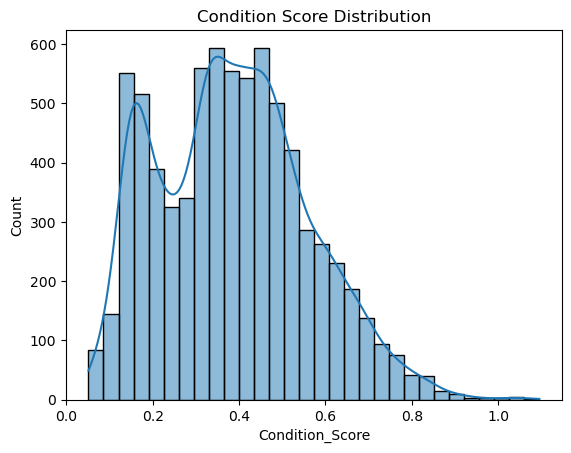

In [14]:
print(df['Condition_Score'].describe())

sns.histplot(df['Condition_Score'], bins=30, kde=True)
plt.title('Condition Score Distribution')
plt.show()


In [15]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
lb1=LabelEncoder()
df['Failure_Type']=lb.fit_transform(df['Failure_Type'])
# df['Priority']=lb1.fit_transform(df['Priority'])
print(lb.classes_)
# print(lb.inverse_transform([0,1,2,3]))
# print(lb1.classes_)
# print(lb1.inverse_transform([0,1,2]))

['Heat Dissipation Failure' 'No Failure' 'Overstrain Failure'
 'Power Failure']


In [16]:
from sklearn.model_selection import train_test_split
df.drop(columns=['Priority','GPS_Longitude','GPS_Latitude','GPS_Bearing','GPS_Altitude','Maintenance_flag'],axis=1,inplace=True)
x=df.drop(columns=['Failure_Type'])
y=df['Failure_Type']



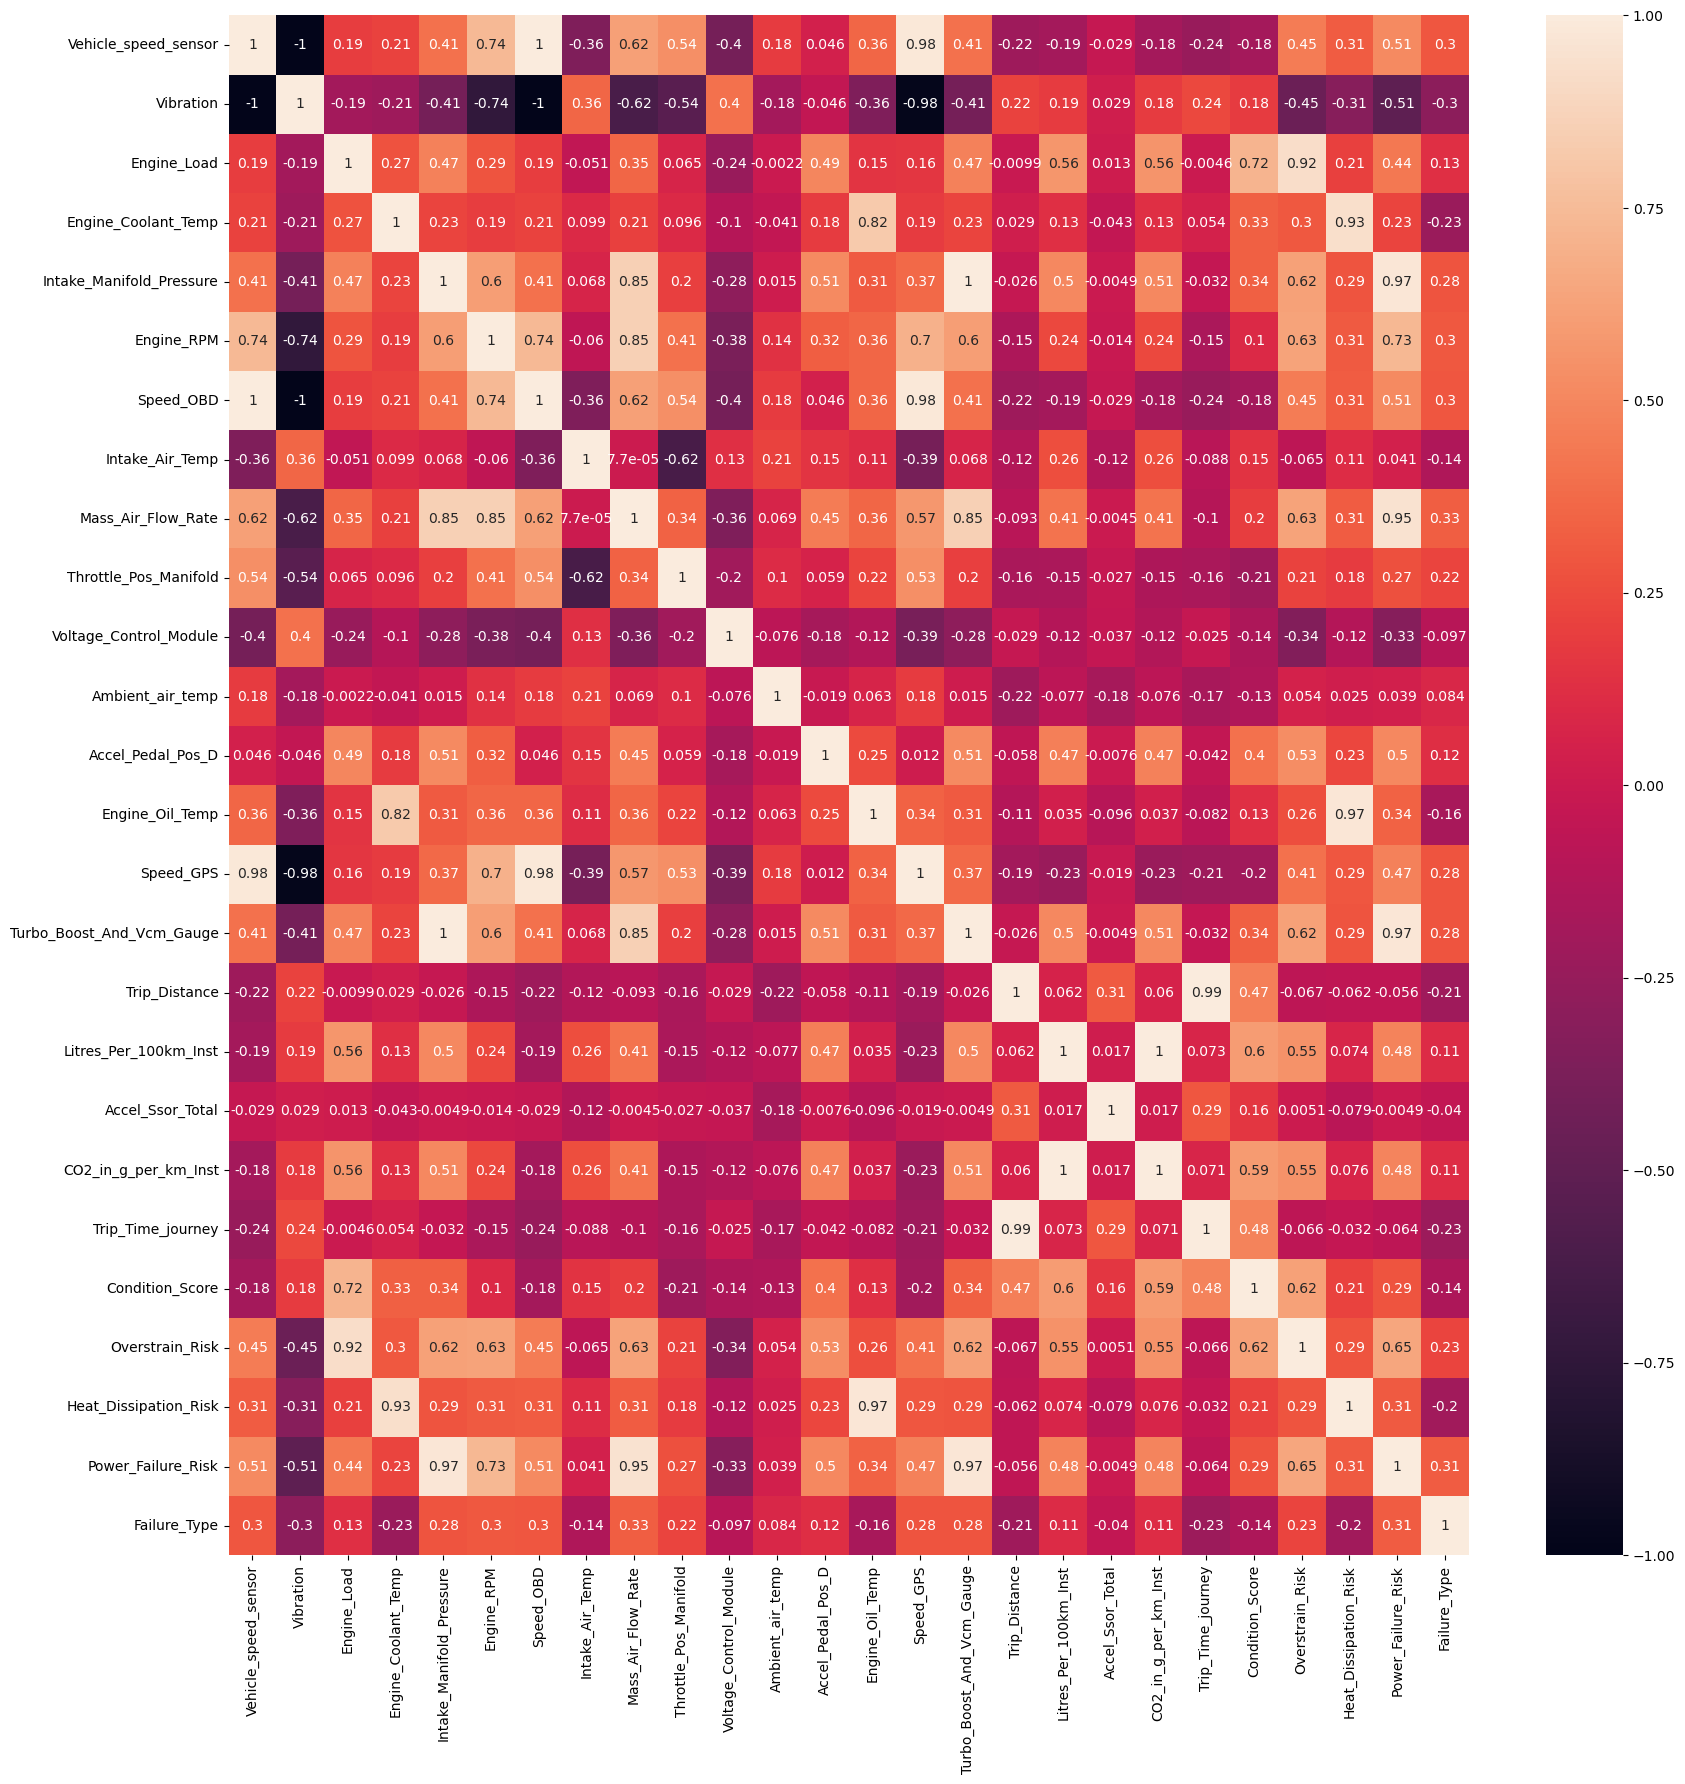

In [17]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.draw()

In [18]:
df.columns

Index(['Vehicle_speed_sensor', 'Vibration', 'Engine_Load',
       'Engine_Coolant_Temp', 'Intake_Manifold_Pressure', 'Engine_RPM',
       'Speed_OBD', 'Intake_Air_Temp', 'Mass_Air_Flow_Rate',
       'Throttle_Pos_Manifold', 'Voltage_Control_Module', 'Ambient_air_temp',
       'Accel_Pedal_Pos_D', 'Engine_Oil_Temp', 'Speed_GPS',
       'Turbo_Boost_And_Vcm_Gauge', 'Trip_Distance', 'Litres_Per_100km_Inst',
       'Accel_Ssor_Total', 'CO2_in_g_per_km_Inst', 'Trip_Time_journey',
       'Condition_Score', 'Overstrain_Risk', 'Heat_Dissipation_Risk',
       'Power_Failure_Risk', 'Failure_Type'],
      dtype='object')

In [19]:
xtrain,xtest, ytrain, ytest=train_test_split(x,y,test_size=0.2,random_state=42)
xtrain,xval,ytrain,yval=train_test_split(xtrain, ytrain, test_size=0.1,random_state=42)
train = lgb.Dataset(xtrain,label=ytrain)
val=lgb.Dataset(xval,label=yval)


In [20]:
params = {
    'objective': 'multiclass',
    'num_class': len(lb.classes_),  
    'boosting_type': 'gbdt',
    'metric': 'multi_logloss',
    'learning_rate': 0.05,
    'max_depth': 6,
    'num_leaves': 31,
    'min_data_in_leaf': 20,
    'lambda_l1': 0.1,
    'lambda_l2': 0.1,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1,
    'seed': 42
}
params['is_unbalance'] = True

In [21]:
early_stopping_callback = lgb.early_stopping(stopping_rounds=30)
verbose_eval_callback = lgb.log_evaluation(period=10)

lgb_model = lgb.train(
    params,
    train,
    num_boost_round=350,  
    valid_sets=[train, val],
    callbacks=[early_stopping_callback, verbose_eval_callback]
)


Training until validation scores don't improve for 30 rounds
[10]	training's multi_logloss: 0.414168	valid_1's multi_logloss: 0.445368
[20]	training's multi_logloss: 0.214301	valid_1's multi_logloss: 0.246473
[30]	training's multi_logloss: 0.115756	valid_1's multi_logloss: 0.148157
[40]	training's multi_logloss: 0.0672597	valid_1's multi_logloss: 0.100595
[50]	training's multi_logloss: 0.0431175	valid_1's multi_logloss: 0.0779926
[60]	training's multi_logloss: 0.0297959	valid_1's multi_logloss: 0.0648895
[70]	training's multi_logloss: 0.0221679	valid_1's multi_logloss: 0.058271
[80]	training's multi_logloss: 0.0169413	valid_1's multi_logloss: 0.0538529
[90]	training's multi_logloss: 0.0130656	valid_1's multi_logloss: 0.0513652
[100]	training's multi_logloss: 0.0103375	valid_1's multi_logloss: 0.050228
[110]	training's multi_logloss: 0.00831921	valid_1's multi_logloss: 0.0489524
[120]	training's multi_logloss: 0.00690339	valid_1's multi_logloss: 0.0477636
[130]	training's multi_logloss:

In [22]:
predprob = lgb_model.predict(xtest)

pred = [np.argmax(prob) for prob in predprob]
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(ytest, pred))

0.9893404397068621


In [23]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       789
           1       0.99      1.00      1.00       501
           2       0.98      0.98      0.98       205
           3       1.00      0.50      0.67         6

    accuracy                           0.99      1501
   macro avg       0.99      0.87      0.91      1501
weighted avg       0.99      0.99      0.99      1501



In [28]:
def get_user_input():
    user_records = []
    while True:
        print("\nEnter vehicle parameters:")
        engine_load = float(input("Enter Engine Load: "))
        engine_rpm = float(input("Enter Engine RPM: "))
        engine_coolant_temp = float(input("Enter Engine Coolant Temperature: "))
        trip_distance = float(input("Enter Trip Distance: "))
        trip_time_journey = float(input("Enter Trip Time Journey: "))
        vibration = float(input("Enter Vibration: "))
        mass_air_flow_rate = float(input("Enter Mass Air Flow Rate: "))
        engine_oil_temp = float(input("Enter Engine Oil Temperature: "))
        throttle_pos_manifold = float(input("Enter Throttle Position: "))
        accel_ssor_total = float(input("Enter Acceleration Sensor Total: "))
        turbo_boost_vcm = float(input("Enter Turbo Boost & VCM Gauge: "))

        # Adding the missing attributes
        vehicle_speed_sensor = float(input("Enter Vehicle Speed Sensor: "))
        intake_manifold_pressure = float(input("Enter Intake Manifold Pressure: "))
        speed_obd = float(input("Enter Speed OBD: "))
        intake_air_temp = float(input("Enter Intake Air Temperature: "))
        voltage_control_module = float(input("Enter Voltage Control Module: "))
        ambient_air_temp = float(input("Enter Ambient Air Temperature: "))
        accel_pedal_pos_d = float(input("Enter Acceleration Pedal Position D: "))
        speed_gps = float(input("Enter Speed GPS: "))
        litres_per_100km_inst = float(input("Enter Litres Per 100km Inst: "))
        co2_in_g_per_km_inst = float(input("Enter CO2 in g/km Inst: "))

        user_records.append({
            'Engine_Load': engine_load,
            'Engine_RPM': engine_rpm,
            'Engine_Coolant_Temp': engine_coolant_temp,
            'Vibration': vibration,
            'Mass_Air_Flow_Rate': mass_air_flow_rate,
            'Engine_Oil_Temp': engine_oil_temp,
            'Throttle_Pos_Manifold': throttle_pos_manifold,
            'Accel_Ssor_Total': accel_ssor_total,
            'Trip_Distance': trip_distance,
            'Trip_Time_journey': trip_time_journey,
            'Turbo_Boost_And_Vcm_Gauge': turbo_boost_vcm,
            'Vehicle_Speed_Sensor': vehicle_speed_sensor,
            'Intake_Manifold_Pressure': intake_manifold_pressure,
            'Speed_OBD': speed_obd,
            'Intake_Air_Temp': intake_air_temp,
            'Voltage_Control_Module': voltage_control_module,
            'Ambient_Air_Temp': ambient_air_temp,
            'Accel_Pedal_Pos_D': accel_pedal_pos_d,
            'Speed_GPS': speed_gps,
            'Litres_Per_100km_Inst': litres_per_100km_inst,
            'CO2_in_g_per_km_Inst': co2_in_g_per_km_inst
        })

        add = input("Do you want to enter another instance? (yes/no): ").strip().lower()
        if add != 'yes':
            break

    user_df = pd.DataFrame(user_records)

    user_df[features_to_normalize] = scaler.transform(user_df[features_to_normalize])

    condition_score = calculate_condition_score(user_df)
    user_df['Condition_Score'] = condition_score
    calc_risk(user_df)

    return user_df


In [30]:
import numpy as np

def predict_failure():
    user_df = get_user_input()

    print("\nUser DataFrame:")
    print(user_df.head())
    # feature_names = lgb_model.feature_name()
    # user_df = user_df[feature_names] 
    prediction = lgb_model.predict(user_df)

    predicted_class_indices = np.argmax(prediction, axis=1)

    failure_types = lb.inverse_transform(predicted_class_indices.reshape(-1,))

    user_df["Predicted_Failure_Type"] = failure_types

    print("\nFinal Predicted Failures:")
    print(user_df[["Condition_Score", "Predicted_Failure_Type"]])

    return user_df

predicted_df = predict_failure()
predicted_df = predicted_df.sort_values(by="Condition_Score", ascending=False)


Enter vehicle parameters:


Enter Engine Load:  43
Enter Engine RPM:  1588
Enter Engine Coolant Temperature:  82
Enter Trip Distance:  310
Enter Trip Time Journey:  11539
Enter Vibration:  244.015
Enter Mass Air Flow Rate:  27.08
Enter Engine Oil Temperature:  85
Enter Throttle Position:  80
Enter Acceleration Sensor Total:  0.04
Enter Turbo Boost & VCM Gauge:  5.1
Enter Vehicle Speed Sensor:  117
Enter Intake Manifold Pressure:  13
Enter Speed OBD:  14.16
Enter Intake Air Temperature:  8
Enter Voltage Control Module:  14.4
Enter Ambient Air Temperature:  9
Enter Acceleration Pedal Position D:  32.9
Enter Speed GPS:  100.62
Enter Litres Per 100km Inst:  4.03
Enter CO2 in g/km Inst:  56
Do you want to enter another instance? (yes/no):  no



User DataFrame:
   Engine_Load  Engine_RPM  Engine_Coolant_Temp  Vibration  \
0     0.431693     0.47666                  0.2   0.311791   

   Mass_Air_Flow_Rate  Engine_Oil_Temp  Throttle_Pos_Manifold  \
0             0.18938              0.5               0.977941   

   Accel_Ssor_Total  Trip_Distance  Trip_Time_journey  ...  \
0          0.648544       0.992149           0.986216  ...   

   Voltage_Control_Module  Ambient_Air_Temp  Accel_Pedal_Pos_D  Speed_GPS  \
0                    14.4               9.0               32.9     100.62   

   Litres_Per_100km_Inst  CO2_in_g_per_km_Inst  Condition_Score  \
0                   4.03                  56.0         0.440939   

   Overstrain_Risk  Heat_Dissipation_Risk  Power_Failure_Risk  
0         0.454176                   0.38            0.193263  

[1 rows x 25 columns]

Final Predicted Failures:
   Condition_Score    Predicted_Failure_Type
0         0.440939  Heat Dissipation Failure


In [ ]:
import pickle

with open('lg.pkl', 'wb') as f:
    pickle.dump(bestsvm, f)


with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)